In [75]:
from typing import type_check_only

torch.manual_seed(123)

model = SimpleLinearRegression(num_features=2)

In [76]:
x = torch.tensor([1.1, 2.1])

with torch.no_grad():  # in newer vesion of pyTorch we can also use with torch.inference_mode():
    proba = model(x)
print(proba)

tensor([0.3500])


# Defining Data Loader

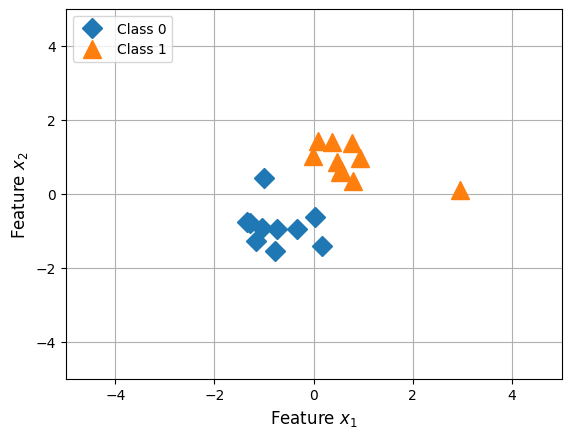

In [77]:
data = {
    'x1': [0.77, -0.33, 0.91, -0.37, -0.63, 0.39, -0.49, -0.68, -0.10, -0.05,
           3.88, 0.73, 0.83, 1.59, 1.14, 1.73, 1.31, 1.56, 1.23, 1.33],
    'x2': [-1.14, 1.44, -3.07, -1.91, -1.53, -1.99, -2.74, -1.52, -3.43, -1.95,
           0.65, 2.97, 3.94, 1.25, 3.91, 2.80, 1.85, 3.85, 2.54, 2.03],
    'label': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
}

df = pd.DataFrame(data)
X_train = df[['x1', 'x2']].values
y_train = df['label'].values
X_train = (X_train - X_train.mean(axis=0))/(X_train.std(axis=0))
import matplotlib.pyplot as plt
plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0",
)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker="^",
    markersize=13,
    linestyle="",
    label="Class 1",
)
plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()


In [105]:
import torch

class SimpleLinearRegression(torch.nn.Module):

    def __init__(self, num_features):
        super().__init__()
        self.num_features = num_features
        self.linear = torch.nn.Linear(in_features=num_features, out_features=1)

    def forward(self, x):
        logits = self.linear(x)
        probas = torch.sigmoid(logits)
        return probas






In [106]:
from torch.utils.data import DataLoader, Dataset

class MyDataset(Dataset):

    def __init__(self, X, y):
        self.features = torch.tensor(X, dtype=torch.float32)
        self.labels = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return self.labels.shape[0]

    def __getitem__(self, idx):
        x = self.features[idx]
        y = self.labels[idx]
        return x, y

In [107]:

train_ds = MyDataset(X_train, y_train)

train_dataloader = DataLoader(
    dataset=train_ds,
    batch_size=10,
    shuffle=True
)


In [116]:
# Training loo
import torch.nn.functional as F

torch.manual_seed(1)
model = SimpleLinearRegression(num_features=2)
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

n_epochs = 20

for epoch in range(n_epochs):
    model = model.train()
    for batch_idx, (features, class_labels) in enumerate(train_dataloader):
        # logits = model(features)
        probas = model(features)
        # loss = F.binary_cross_entropy_with_logits(logits, class_labels.view(probas.shape))
        loss = F.binary_cross_entropy(probas, class_labels.view(probas.shape)) # to reshape to class array to match the proba values

        optimizer.zero_grad() # set oev fuc to 0
        loss.backward() # compute the gradients
        optimizer.step() # update the parameter

        print(f"Epoch: {epoch+1:03d}/{n_epochs:03d}"
              f"Batch | {batch_idx:03d}/{len(train_dataloader):03d}"
              f"Loss: | {loss:.3f}"
              )




Epoch: 001/020Batch | 000/002Loss: | 0.671
Epoch: 001/020Batch | 001/002Loss: | 0.733
Epoch: 002/020Batch | 000/002Loss: | 0.672
Epoch: 002/020Batch | 001/002Loss: | 0.669
Epoch: 003/020Batch | 000/002Loss: | 0.600
Epoch: 003/020Batch | 001/002Loss: | 0.683
Epoch: 004/020Batch | 000/002Loss: | 0.693
Epoch: 004/020Batch | 001/002Loss: | 0.536
Epoch: 005/020Batch | 000/002Loss: | 0.609
Epoch: 005/020Batch | 001/002Loss: | 0.569
Epoch: 006/020Batch | 000/002Loss: | 0.586
Epoch: 006/020Batch | 001/002Loss: | 0.545
Epoch: 007/020Batch | 000/002Loss: | 0.513
Epoch: 007/020Batch | 001/002Loss: | 0.576
Epoch: 008/020Batch | 000/002Loss: | 0.511
Epoch: 008/020Batch | 001/002Loss: | 0.535
Epoch: 009/020Batch | 000/002Loss: | 0.513
Epoch: 009/020Batch | 001/002Loss: | 0.493
Epoch: 010/020Batch | 000/002Loss: | 0.534
Epoch: 010/020Batch | 001/002Loss: | 0.436
Epoch: 011/020Batch | 000/002Loss: | 0.415
Epoch: 011/020Batch | 001/002Loss: | 0.522
Epoch: 012/020Batch | 000/002Loss: | 0.461
Epoch: 012/

In [117]:
print(probas)

tensor([[0.6687],
        [0.6810],
        [0.2162],
        [0.7398],
        [0.2126],
        [0.5744],
        [0.3209],
        [0.6503],
        [0.4276],
        [0.2598]], grad_fn=<SigmoidBackward0>)


In [118]:
pred = torch.where(probas > 0.5, 1, 0)
print(pred)

tensor([[1],
        [1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [0]])


In [125]:
print(class_labels.view(pred.shape).to(pred.dtype))

tensor([[1],
        [1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [0]])


In [126]:
class_labels

tensor([1., 1., 0., 1., 0., 1., 0., 1., 0., 0.])

In [127]:
def compute_accuracy(model, dataloader:DataLoader):

    model = model.eval()
    correct =0
    total_examples = 0

    for idx , (features, class_labels) in enumerate(dataloader):

        with torch.no_grad():
            probas = model(features)

        pred = torch.where(probas > 0.5, 1, 0)
        labels = class_labels.view(pred.shape).to(pred.dtype)

        compare = pred == labels
        correct += torch.sum(compare)
        total_examples += len(compare)

    return  correct/total_examples


In [130]:
train_acc = compute_accuracy(model, train_dataloader)
print(f"train accuracy: {train_acc*100:.3f}%")

train accuracy: 100.000%


In [138]:
model.linear.weight[0][0].detach()

tensor(0.8279)

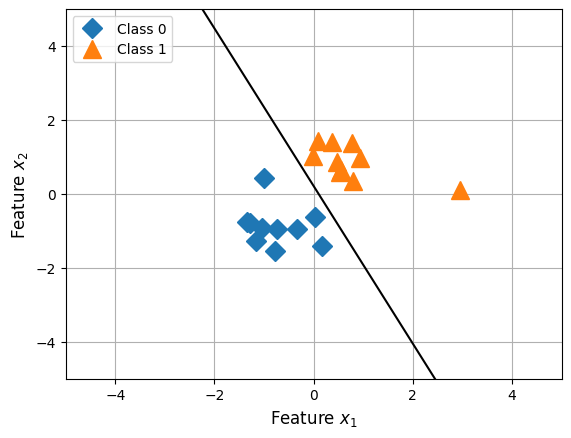

In [154]:
def plot_decision_boundary(model):

    w1 = model.linear.weight[0][0].detach()
    w2 =model.linear.weight[0][1].detach()
    b = model.linear.bias[0].detach()

    x1_min = -20
    x2_min = (-(w1 * x1_min) - b) / w2

    x1_max = 20
    x2_max = (-(w1 * x1_max) - b) / w2

    return x1_min, x2_min.item(), x1_max, x2_max.item()




x1_min, x2_min, x1_max, x2_max = plot_decision_boundary(model)

plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0",
)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker="^",
    markersize=13,
    linestyle="",
    label="Class 1",
)

plt.plot([x1_min, x1_max], [x2_min, x2_max], color="k")

plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()


In [153]:
x1_min, x2_min.item(), x1_max, x2_max

(-20, 42.86381912231445, 20, tensor(-42.4370))